In [1]:
import sqlite3
import sys
import csv
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def float_or_none(x):
	try:
		return float(x)
	except:
		return None
  
conn = sqlite3.connect("SE4ALL.db")
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS energy (CountryName TEXT NOCASE, IndicatorCode TEXT NOCASE, Year INTEGER, Value REAL)''') #<--make sure to only do this once ;)
conn.commit()
with open("lab_data/SE4ALLData.csv", 'r') as csvfile:
	reader = csv.reader(csvfile, delimiter=',', quotechar='"')
	headers = next(reader)
	headerid = {}

	for i,h in enumerate(headers):
		headerid[h] = i
	
	for row in reader:
		for year in range(1990,2017):
			cursor.execute("INSERT INTO energy VALUES (:CountryName, :IndicatorCode, :Year, :Value)", {
			'CountryName': row[0],
			'IndicatorCode': row[3],
			'Year': year,
			'Value': float_or_none( row[headerid[str(year)]] )
			})

conn.commit()

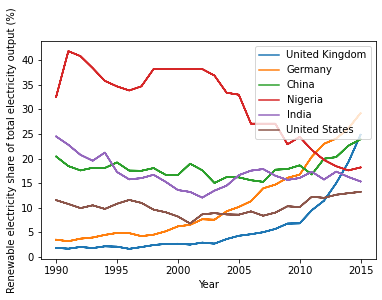

In [3]:

countries = ["United Kingdom", "Germany", "China", "Nigeria", "India", "United States"]
data = {}
for country in countries:
    data[ country ] = [[], []]
    cursor.execute("SELECT Year, Value FROM energy WHERE IndicatorCode = '4.1_SHARE.RE.IN.ELECTRICITY' AND CountryName = '" +country +"'" )
    energy = []
    date = []
    for row in cursor.fetchall():
        data[ country ][0].append( row[0] )
        data[ country ][1].append( row[1] )
    plt.plot(data[ country ][0], data[ country ][1], label=country)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Renewable electricity share of total electricity output (%)")
plt.show()
plt.close()



In [8]:
data = list("AAAJOIWHEJHFREASALADJFALSKDJFKDJFAOEFAIFEFHSHFAWO")
data = ['A', 'A', 'B', 'B', 'C', 'A', 'C', 'A', 'A']

current_element = ""
count = 0
for element in data:
    if count == 0:
        current_element = element
        count = 1
    else:
        if element == current_element:
            count += 1
        if element != current_element:
            count -= 1

print("majority candidate =", current_element)

majority candidate = A


In [62]:
list(np.random.randint(0,10, (3,)))

[5, 8, 8]

In [90]:
import numpy as np


current_val = [1,1,1]
counters = []
for i in range(1000):
    counter = 0
    while current_val != [0,0,0]:
        current_val = list(np.random.randint(0,10, (3,)))
        counter += 1
    current_val = [1,1,1]
    counters.append(counter)

print(np.mean(counters))


976.406


In [64]:
print(counter, current_val)

912 [0, 0, 0]
